In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import typing as tp
from abc import ABC, abstractmethod
from scipy.optimize import minimize_scalar

print("hi")

hi


In [2]:
def f_MAX_XD(x, y):
    return (x**2 - 1)**2 + y**2

def df_dx_MAX(x, y):
    return 4 * x * (x**2 - 1)

def df_dy_MAX(x, y):
    return 2 * y

def grad_f_MAX(x, y):
    return np.array([df_dx_MAX(x, y), df_dy_MAX(x, y)])

stationary_MAX_XD = [
                    {'coords': (-1, 0), 'char': 'min'},
                    {'coords': (0, 0), 'char': 'saddle'},
                    {'coords': (1, 0), 'char': 'min'}
                    ]
f_max = f_MAX_XD
stationary_max = stationary_MAX_XD

df_dx_max = df_dx_MAX
df_dy_max = df_dy_MAX
grad_f_max = grad_f_MAX

In [3]:
def f_ILYUSHKA_LOOOL(x, y):
    return x ** 2 + y ** 4 - 2 * y **  2

stationary_ILYUSHKA_LOOOL = [
                            {'coords': (0, 0), 'char': 'saddle'},
                            {'coords': (0, 1), 'char': 'min'},
                            {'coords': (0, -1), 'char': 'min'}
                             ]

def df_dx_ilyushka(x, y):
    return  x * 2

def df_dy_ilyushka(x, y):
    return 4 * y ** 3 - y * 4

def grad_f_ilyushka(x, y):
    return np.array([x * 2, 4 * y ** 3 - y * 4])

In [4]:
f = f_ILYUSHKA_LOOOL
stationary = stationary_ILYUSHKA_LOOOL

df_dx = df_dx_ilyushka
df_dy = df_dy_ilyushka
grad_f = grad_f_ilyushka

In [5]:
def get_col_from_char(char: str) -> str:
    return {
        'saddle': 'purple',
        'min': 'blue',
        'max': 'red'
    }[char]

In [6]:
def draw_plot_f(X, Y, Z, points, mode: tp.Literal['plot', 'levels'] = 'plot'):
    ncols = 4 if mode == 'levels' else 3
    width = 20 if mode == 'levels' else 15
    
    fig = plt.figure(figsize=(width, 5))

    axes = []
    for i in range(3):
        axes.append(fig.add_subplot(1, ncols, i + 1, projection='3d'))

    views = [
        {'elev': 30, 'azim': 120},
        {'elev': -25, 'azim': 120},
        {'elev': 15, 'azim': 0}
    ]

    for i in range(3):
        ax = axes[i]
        view = views[i]
        ax.view_init(**view)
        
        if mode == 'plot':
            surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
            fig.colorbar(surf, ax=ax, shrink=0.5)
        elif mode == 'levels':
            ax.contour(X, Y, Z, levels=20, cmap='viridis')
            
        ax.set_title(f"View: elev={view['elev']}, azim={view['azim']}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        for point in points:
            px, py = point['coords']
            pz = f(px, py)
            ax.scatter(px, py, pz, color=get_col_from_char(point['char']), s=50, label=point['char'], edgecolors='k')
        
        ax.legend()

    if mode == 'levels':
        ax2 = fig.add_subplot(1, ncols, 4)
        
        contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
        ax2.clabel(contour, inline=True, fontsize=8)
        
        ax2.set_title('2D Линии уровня')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.grid(True, alpha=0.3)

        for point in points:
            px, py = point['coords']
            ax2.scatter(px, py, color=get_col_from_char(point['char']), s=50, label=point['char'], edgecolors='k')
        
        ax2.legend()

    plt.tight_layout()
    plt.show()

In [7]:
x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

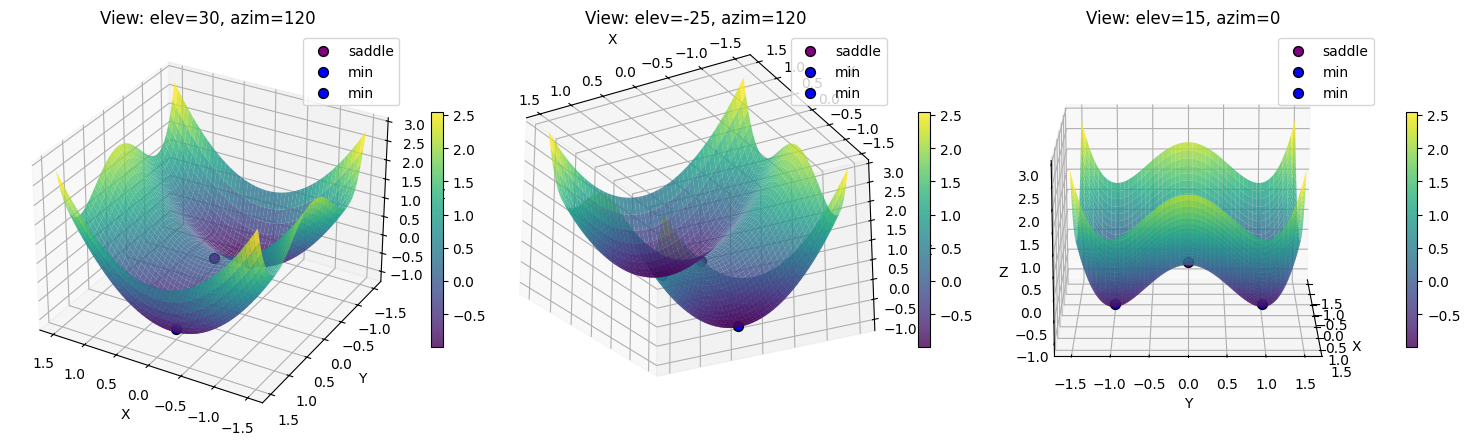

In [8]:
draw_plot_f(X, Y, Z, stationary, 'plot')

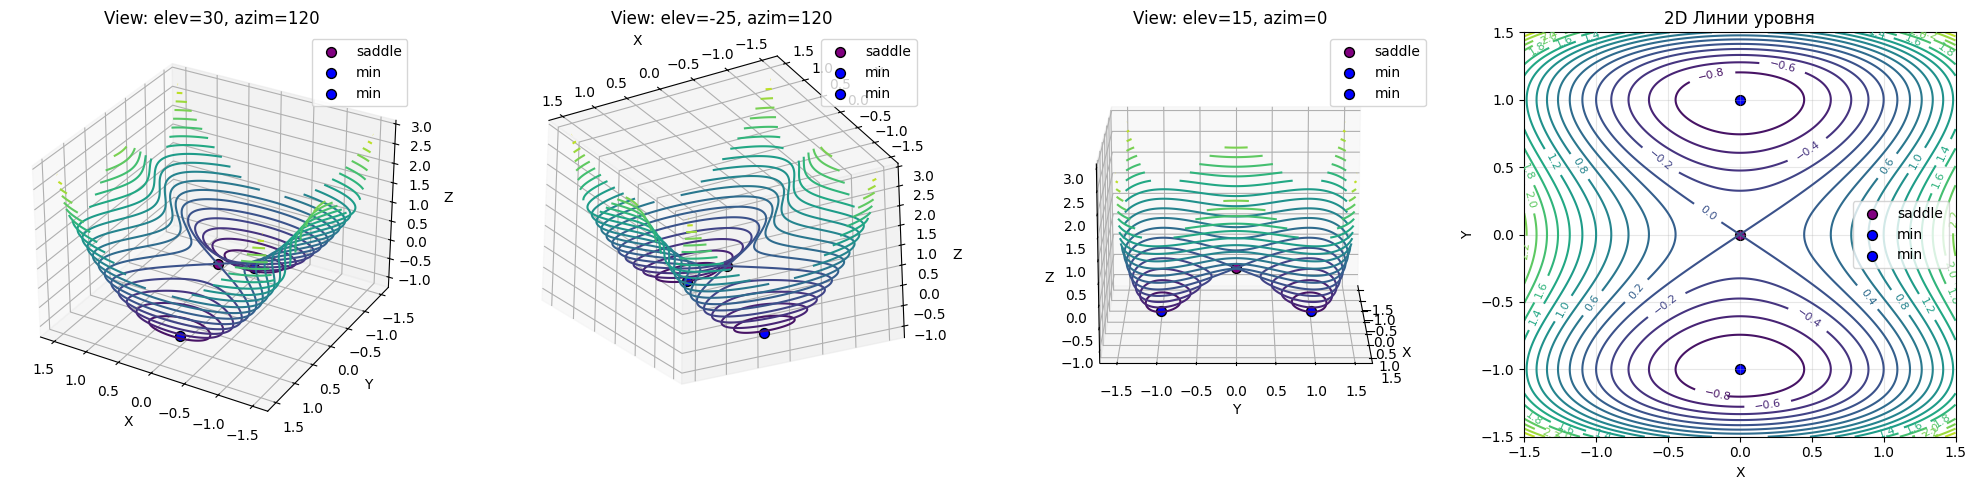

In [9]:
draw_plot_f(X, Y, Z, stationary, 'levels')

Покажем, что направление наискорейшего возрастания функции совпадает с направлением градиента, а убывания - с направлением антиградиента.

1. Рассмотрим производную функции $f(x, y)$ по направлению вектора $l$ в точке $M$. Пусть $l$ - единичный вектор ($|l| = 1$). Производная по направлению вычисляется через скалярное произведение градиента на этот вектор:
   $$ \frac{\partial f}{\partial l} = (\nabla f, l) $$

2. Раскроем скалярное произведение через косинус угла $\alpha$ между вектором градиента $\nabla f$ и вектором направления $l$:
   $$ \frac{\partial f}{\partial l} = |\nabla f| \cdot |l| \cdot \cos \alpha = |\nabla f| \cdot \cos \alpha$$

3. Величина $|\nabla f|$ фиксирована в точке $M$. Чтобы максимизировать $\frac{\partial f}{\partial l}$, нужно максимизировать $\cos \alpha$.
   Максимум $\cos \alpha = 1$ достигается при $\alpha = 0$.
   *Вывод:* Угол между направлением движения и градиентом равен 0. Движение происходит **по направлению градиента**.

4. Чтобы минимизировать $\frac{\partial f}{\partial l}$ (получить наибольшую скорость падения), нужно минимизировать $\cos \alpha$.
   Минимум $\cos \alpha = -1$ достигается при $\alpha = \pi$ ($180^\circ$).
   *Вывод:* Вектор движения направлен противоположно градиенту. Это направление **антиградиента** $(-\nabla f)$.


In [10]:
def visualize_gradient_field(X, Y, Z, U, V):
    """
    Визуализирует векторное поле градиента поверх линий уровня.
    
    Параметры:
    X, Y : np.ndarray - координатные сетки
    Z    : np.ndarray - значения функции f(X, Y)
    U, V : np.ndarray - компоненты градиента (df/dx, df/dy)
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    cf = ax.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    fig.colorbar(cf, ax=ax, label='Значение функции f(x, y)')

    c_lines = ax.contour(X, Y, Z, levels=20, colors='white', linewidths=0.5, alpha=0.7)
    ax.clabel(c_lines, inline=True, fontsize=8, fmt='%.1f')

    n_points = max(X.shape)
    step = 1
    if n_points > 30:
        step = n_points // 20
    
    X_q = X[::step, ::step]
    Y_q = Y[::step, ::step]
    U_q = U[::step, ::step]
    V_q = V[::step, ::step]

    Q = ax.quiver(X_q, Y_q, U_q, V_q, color='black', alpha=0.8,
                  angles='xy', scale_units='xy', scale=15,
                  width=0.004, headwidth=4)

    ax.quiverkey(Q, 0.9, 1.03, 1, r'$|\nabla f| = 1$', labelpos='E', coordinates='axes')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [11]:
x = np.linspace(-1.5, 1.5, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)
U = df_dx(X, Y)
V = df_dy(X, Y)

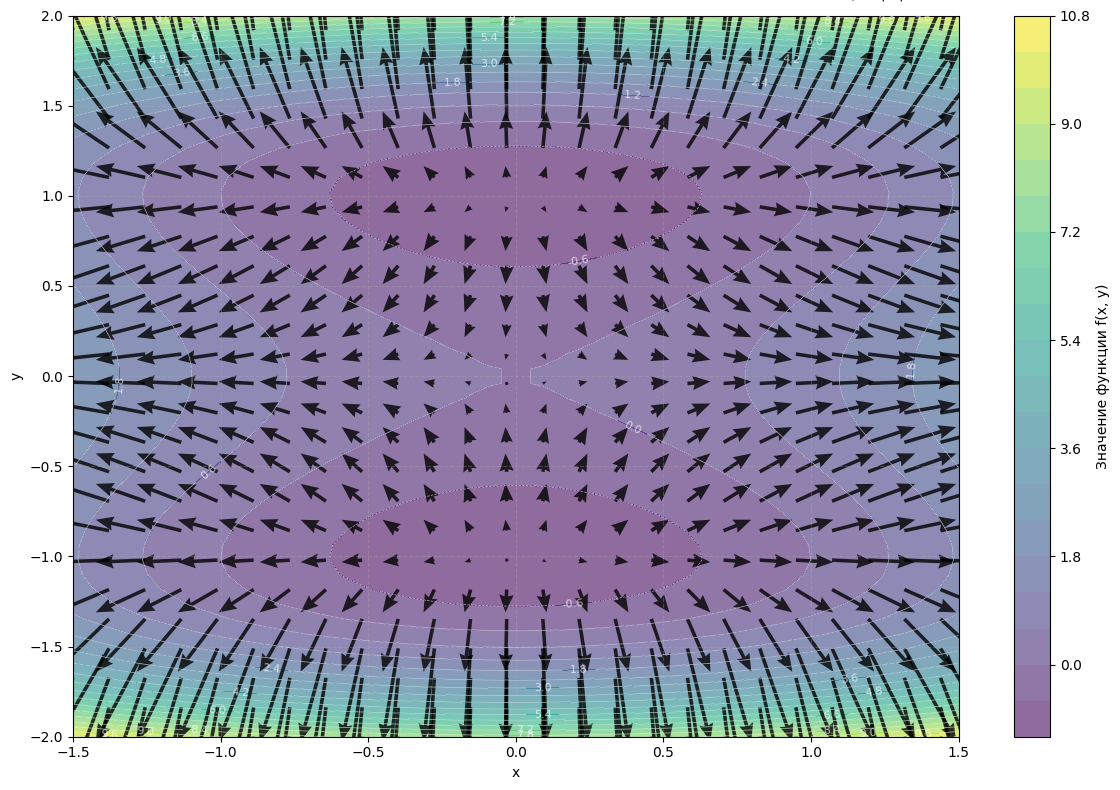

In [12]:
visualize_gradient_field(X, Y, Z, U, V)

In [35]:


class StepAlphaGenerator(ABC):
    @abstractmethod
    def next(self, f, grad_f, x_k, grad_k):
        pass

    def reset(self):
        pass

class ConstStepAlphaGenerator(StepAlphaGenerator):
    def __init__(self, lr: float):
        self.lr = lr

    def next(self, f, grad_f, x_k, grad_k):
        return self.lr

class DivisionStepAlphaGenerator(StepAlphaGenerator):
    def __init__(self, start_lr: float = 0.5, division_rate: float = 0.5):
        self.start_lr = start_lr
        self.rate = division_rate
    
    def next(self, f, grad_f, x_k, grad_k):
        lr = self.start_lr
        current_f = f(x_k[0], x_k[1])

        for _ in range(100):
            x_new = x_k - lr * grad_k
            new_f = f(x_new[0], x_new[1])
            
            if new_f < current_f:
                return lr
            
            lr *= self.rate
            
        return lr

class SteepestDescentStepAlphaGenerator(StepAlphaGenerator):
    def __init__(self, bracket: tuple[float, float] = (0.0, 1.0), sign: str = "-"):
        if bracket[1] <= bracket[0]:
            raise Exception(f"Invalid bracket: {bracket}")
        
        self.bracket = bracket
        self.sign = sign

    def next(self, f, grad_f, x_k, grad_k):

        def phi(lr):
            if (self.sign == "-"):
                new_point = x_k - lr * grad_k
                return f(new_point[0], new_point[1])
            elif (self.sign == "+"):
                new_point = x_k + lr * grad_k
                return f(new_point[0], new_point[1])

        res = minimize_scalar(phi, bracket=self.bracket, method='brent')
        
        return res.x

In [14]:
class GradientDescentSolver:
    def __init__(self, f: tp.Callable[[float, float], float], grad_f: tp.Callable[[float, float], np.ndarray], stepgen: StepAlphaGenerator):
        self.f = f
        self.grad_f = grad_f
        self.step = stepgen
    
    def solve(self, start: tuple[float, float], eps: float = 1e-6, max_iter: int = 100000):
        self.step.reset()
        x = np.array(start, dtype=float)
        history = [x.copy()]

        for i in range(max_iter):
            grad = self.grad_f(x[0], x[1])

            if np.linalg.norm(grad) < eps:
                break

            lr = self.step.next(self.f, self.grad_f, x, grad)
            x = x - lr * grad
            history.append(x.copy())
        
        return (x, history)

In [15]:
class BetaCalculator(ABC):

    @abstractmethod
    def compute(self, grad_k, grad_k_prev, d_k_prev):
        pass

class FletcherReevesBeta(BetaCalculator):
    def compute(self, grad_k, grad_k_prev, d_k_prev):
        norm_grad_k_squared = np.linalg.norm(grad_k) ** 2
        norm_grad_k_prev_squared = np.linalg.norm(grad_k_prev) ** 2

        if norm_grad_k_prev_squared < 1e-15:
            return 0.0

        beta_FR = norm_grad_k_squared / norm_grad_k_prev_squared
        return beta_FR

class PolakRibiereBeta(BetaCalculator):
    def __init__(self, use_positive_only=True):
        self.use_positive_only = use_positive_only

    def compute(self, grad_k, grad_k_prev, d_k_prev):
        y_k_minus_1 = grad_k - grad_k_prev
        numerator = np.dot(grad_k, y_k_minus_1)
        denominator = np.linalg.norm(grad_k_prev) ** 2
        
        if denominator < 1e-15:
            return 0.0

        beta_PR = numerator / denominator

        if self.use_positive_only:
            beta_PR = max(0.0, beta_PR)

        return beta_PR

In [16]:
class ConjugateGradientSolver:
    def __init__(self, f: tp.Callable, grad_f: tp.Callable, 
                 stepgen: StepAlphaGenerator, method: str = 'PR'):
        self.f = f
        self.grad_f = grad_f
        self.step = stepgen
        self.method = method
    def _compute_beta(self, grad_k, grad_k_prev, d_k_prev):
        if self.method == 'FR':
            norm_grad_k_sq = np.linalg.norm(grad_k) ** 2
            norm_grad_k_prev_sq = np.linalg.norm(grad_k_prev) ** 2

            if norm_grad_k_prev_sq < 1e-15:
                return 0.0
            return norm_grad_k_sq / norm_grad_k_prev_sq
        else:
            y = grad_k - grad_k_prev
            numerator = np.dot(grad_k, y)
            denominator = np.linalg.norm(grad_k_prev) ** 2

            if denominator < 1e-15:
                return 0.0

            beta_PR = numerator / denominator
            return max(0.0, beta_PR)
    def solve(self, start: tuple, eps: float = 1e-6, max_iter: int = 100000):
        self.step.reset()
        x = np.array(start, dtype=float)
        history = [x.copy()]
        grad = self.grad_f(x[0], x[1])
        d = -grad
        for i in range(max_iter):
            if np.linalg.norm(grad) < eps:
                break
            lr = self.step.next(self.f, self.grad_f, x, d)
            grad_prev = grad.copy()
            d_prev = d.copy()
            
            x = x + lr * d
            history.append(x.copy())

            grad = self.grad_f(x[0], x[1])

            beta = self._compute_beta(grad, grad_prev, d_prev)

            d = -grad + beta * d_prev
        return (x, history)



In [17]:
def compare_trajectories(f, trajectories: dict, x_range=(-1.5, 1.5), y_range=(-2, 2)):
    x = np.linspace(x_range[0], x_range[1], 200)
    y = np.linspace(y_range[0], y_range[1], 200)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    n_plots = len(trajectories)
    fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 6))
    
    if n_plots == 1:
        axes = [axes]

    for ax, (label, history) in zip(axes, trajectories.items()):
        contour_filled = ax.contourf(X, Y, Z, levels=30, cmap='viridis', alpha=0.6)
        ax.contour(X, Y, Z, levels=30, colors='white', linewidths=0.5, alpha=0.5)
        
        hist_arr = np.array(history)
        
        ax.plot(hist_arr[:, 0], hist_arr[:, 1], 'r-o', 
                linewidth=1.5, markersize=3, alpha=0.8, label='Path')
        
        ax.scatter(hist_arr[0, 0], hist_arr[0, 1], c='blue', s=100, marker='x', label='Start', zorder=5, linewidth=2)
        
        ax.scatter(hist_arr[-1, 0], hist_arr[-1, 1], c='yellow', s=150, marker='*', edgecolors='black', label='End', zorder=6)

        ax.set_title(f"{label}\nSteps: {len(history)-1}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper right', fontsize='small')

    fig.colorbar(contour_filled, ax=axes, fraction=0.02, pad=0.02, label='f(x, y)')
    
    plt.show()

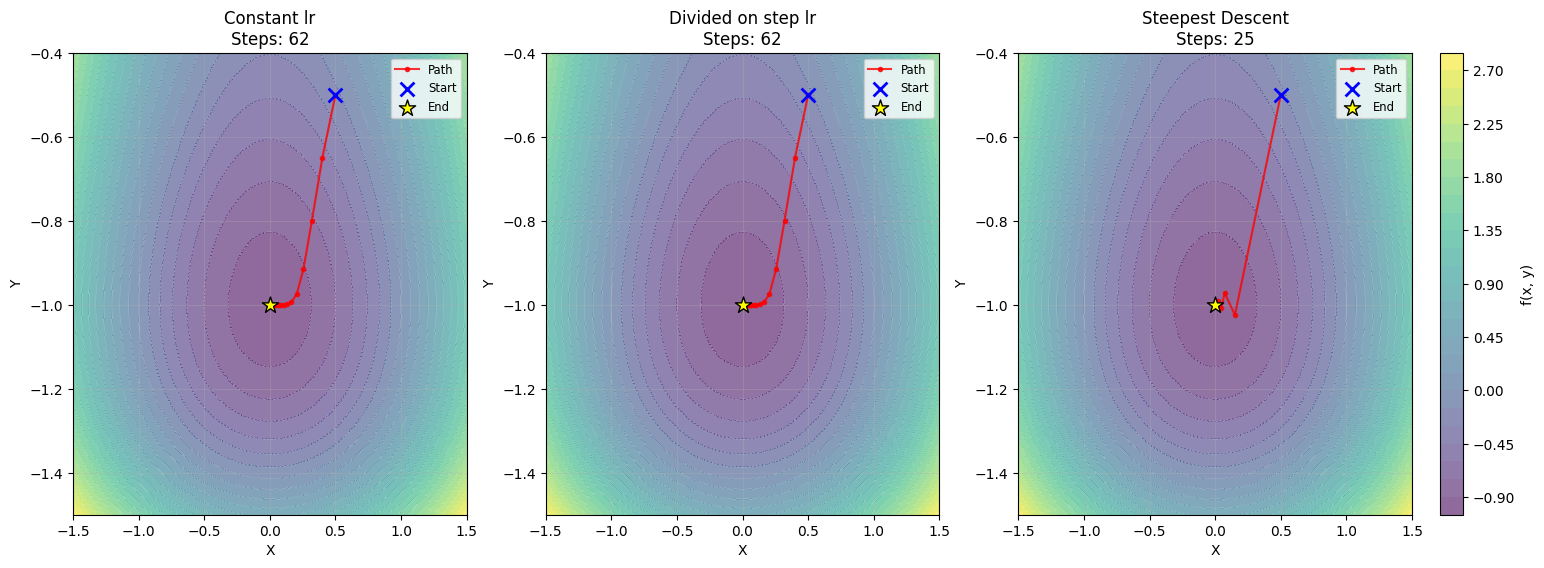

In [18]:
start = (0.5, -0.5)

results = {
    'Constant lr': GradientDescentSolver(f, grad_f, ConstStepAlphaGenerator(0.1)).solve(start)[1],
    'Divided on step lr': GradientDescentSolver(f, grad_f, DivisionStepAlphaGenerator(0.1)).solve(start)[1],
    'Steepest Descent': GradientDescentSolver(f, grad_f, SteepestDescentStepAlphaGenerator()).solve(start)[1]
}

compare_trajectories(f, results, x_range=(-1.5, 1.5), y_range=(-1.5, -0.4))

In [32]:
def print_results(expected, results):
    for label, res in results.items():
        x, y = res[0][0], res[0][1]
        print(f"Method: {label}, min: ({x:.4f}, {y:.4f}), actual: {expected}. Done in {len(res[1])} steps.")

start = (0.5, -0.5)
expected = (0, -1)

results = {
    'Constant lr': GradientDescentSolver(f, grad_f, ConstStepAlphaGenerator(0.1)).solve(start),
    'Divided on step lr': GradientDescentSolver(f, grad_f, DivisionStepAlphaGenerator(0.1)).solve(start),
    'Steepest Descent': GradientDescentSolver(f, grad_f, SteepestDescentStepAlphaGenerator()).solve(start)
}

print_results(expected, results)

Method: Constant lr, min: (1.0000, -0.0000), actual: (0, -1). Done in 63 steps.
Method: Divided on step lr, min: (1.0000, -0.0000), actual: (0, -1). Done in 63 steps.
Method: Steepest Descent, min: (1.0000, -0.0000), actual: (0, -1). Done in 26 steps.


In [37]:
def print_results(expected, results):
    for label, res in results.items():
        x, y = res[0][0], res[0][1]
        print(f"Method: {label:30} min: ({x:.4f}, {y:.4f}), actual: {expected}. Done in {len(res[1])} steps.")

results_cg = {
    'CG (a) Polak-Ribière': ConjugateGradientSolver(f, grad_f, SteepestDescentStepAlphaGenerator(sign="+"), method='PR').solve(start),
    'CG (b) Fletcher-Reeves': ConjugateGradientSolver(f, grad_f, SteepestDescentStepAlphaGenerator(sign="+"), method='FR').solve(start),
}

print_results(expected, results_cg)

Method: CG (a) Polak-Ribière           min: (1.0000, 0.0000), actual: (1, 0). Done in 6 steps.
Method: CG (b) Fletcher-Reeves         min: (1.0000, -0.0000), actual: (1, 0). Done in 12 steps.


In [38]:
print("hi")

hi
